In [97]:
# When a consumer places an order on DoorDash,
#  we show the expected time of delivery. 
# It is very important for DoorDash to get this right,
#  as it has a big impact on consumer experience. 
# In this exercise, 
# you will build a model 
# # # 1️⃣ Load dataset
# df = pd.read_csv("Dataset for project.csv")
# to predict the estimated time taken for a delivery.

In [98]:
# Step 1: Import libraries
from warnings import filterwarnings
import pandas as pd
import numpy as np
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [99]:
# Load dataset
df = pd.read_csv("Dataset.csv")
df

,STORE_PRIMARY_CATEGORY,STORE_ID,TOTAL_ITEMS,SUBTOTAL,NUM_DISTINCT_ITEMS,MIN_ITEM_PRICE,MAX_ITEM_PRICE,ESTIMATED_ORDER_PLACE_DURATION,MARKET_ID,CREATED_AT,ACTUAL_DELIVERY_TIME,ORDER_PROTOCOL,TOTAL_ONSHIFT_DASHERS,TOTAL_BUSY_DASHERS,TOTAL_OUTSTANDING_ORDERS,ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION,DELIVERY_DURATION_SEC
0,american,1845,4,3441,4,557,1239,446,1.0,80657.0,84436.0,1.0,33.0,14.0,21.0,861.0,3779.0
1,mexican,5477,1,1900,1,1400,1400,446,2.0,78565.0,82589.0,2.0,1.0,2.0,2.0,690.0,4024.0
2,Unknown,5477,1,1900,1,1900,1900,446,3.0,74368.0,76149.0,1.0,1.0,0.0,0.0,690.0,1781.0
3,Unknown,5477,6,6900,5,600,1800,446,3.0,76905.0,79980.0,1.0,1.0,1.0,2.0,289.0,3075.0
4,Unknown,5477,3,3900,3,1100,1600,446,3.0,9636.0,12026.0,1.0,6.0,6.0,9.0,650.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183605,fast,2956,3,1389,3,345,649,251,1.0,1181.0,5088.0,4.0,17.0,17.0,23.0,331.0,3907.0
183606,fast,2956,6,3010,4,405,825,251,1.0,119.0,3502.0,4.0,12.0,11.0,14.0,915.0,3383.0
183607,fast,2956,5,1836,3,300,399,251,1.0,17168.0,20176.0,4.0,39.0,41.0,40.0,795.0,3008.0
183608,sandwich,3630,1,1175,1,535,535,446,1.0,65895.0,69802.0,1.0,7.0,7.0,12.0,384.0,3907.0


In [100]:
# # Step 3: Convert datetime columns and create target
# df['created_at'] = pd.to_datetime(df['created_at'])
# df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
# df['delivery_duration_sec'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

In [101]:
# # Step 4: Feature engineering
# if 'order_hour' not in df.columns:
#     df['order_hour'] = df['created_at'].dt.hour
# if 'order_dayofweek' not in df.columns:
#     df['order_dayofweek'] = df['created_at'].dt.dayofweek

In [102]:
df.duplicated().sum()

np.int64(0)

In [103]:
df = df.drop_duplicates()

In [104]:
missing_counts = df.isna().sum()
missing_percentage = (missing_counts/df.shape[0]*100).round(2)
missing_summary = pd.DataFrame({
    "missing_counts": missing_counts,
    "missing_percentage": missing_percentage
})
missing_summary

,missing_counts,missing_percentage
STORE_PRIMARY_CATEGORY,0,0.0
STORE_ID,0,0.0
TOTAL_ITEMS,0,0.0
SUBTOTAL,0,0.0
NUM_DISTINCT_ITEMS,0,0.0
MIN_ITEM_PRICE,0,0.0
MAX_ITEM_PRICE,0,0.0
ESTIMATED_ORDER_PLACE_DURATION,0,0.0
MARKET_ID,0,0.0
CREATED_AT,0,0.0


In [105]:
X = df.drop(columns=['DELIVERY_DURATION_SEC'], axis=1)
Y = df['DELIVERY_DURATION_SEC']

In [106]:
print(df.columns)


Index(['STORE_PRIMARY_CATEGORY', 'STORE_ID', 'TOTAL_ITEMS', 'SUBTOTAL',
       'NUM_DISTINCT_ITEMS', 'MIN_ITEM_PRICE', 'MAX_ITEM_PRICE',
       'ESTIMATED_ORDER_PLACE_DURATION', 'MARKET_ID', 'CREATED_AT',
       'ACTUAL_DELIVERY_TIME', 'ORDER_PROTOCOL', 'TOTAL_ONSHIFT_DASHERS',
       'TOTAL_BUSY_DASHERS', 'TOTAL_OUTSTANDING_ORDERS',
       'ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION',
       'DELIVERY_DURATION_SEC'],
      dtype='object')


In [107]:
cat  = X.select_dtypes(include=['object']).columns.tolist()
con  = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [108]:
print("Categorical:", cat)
print("Numerical:", con)

Categorical: ['STORE_PRIMARY_CATEGORY']
Numerical: ['STORE_ID', 'TOTAL_ITEMS', 'SUBTOTAL', 'NUM_DISTINCT_ITEMS', 'MIN_ITEM_PRICE', 'MAX_ITEM_PRICE', 'ESTIMATED_ORDER_PLACE_DURATION', 'MARKET_ID', 'CREATED_AT', 'ACTUAL_DELIVERY_TIME', 'ORDER_PROTOCOL', 'TOTAL_ONSHIFT_DASHERS', 'TOTAL_BUSY_DASHERS', 'TOTAL_OUTSTANDING_ORDERS', 'ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION']


In [109]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [110]:
num_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value=0),StandardScaler())  
cat_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="Unknown"),OrdinalEncoder())

In [111]:
# combine both the pipelines
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]).set_output(transform="pandas")

In [112]:
pre

,transformers,"[('cat', ...), ('con', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,'Unknown'


In [113]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__STORE_PRIMARY_CATEGORY,con__STORE_ID,con__TOTAL_ITEMS,con__SUBTOTAL,con__NUM_DISTINCT_ITEMS,con__MIN_ITEM_PRICE,con__MAX_ITEM_PRICE,con__ESTIMATED_ORDER_PLACE_DURATION,con__MARKET_ID,con__CREATED_AT,con__ACTUAL_DELIVERY_TIME,con__ORDER_PROTOCOL,con__TOTAL_ONSHIFT_DASHERS,con__TOTAL_BUSY_DASHERS,con__TOTAL_OUTSTANDING_ORDERS,con__ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION
0,5.0,-0.820844,0.306728,0.428651,0.827406,-0.249256,0.146023,1.540413,-1.30998,1.638237,1.681135,-1.254474,-0.253733,-0.759386,-0.625825,1.459855
1,48.0,0.947989,-0.820652,-0.427680,-1.027932,1.372352,0.436362,1.540413,-0.65214,1.569334,1.619985,-0.589196,-1.155069,-1.122806,-0.984146,0.677557
2,0.0,0.947989,-0.820652,-0.427680,-1.027932,2.334160,1.338036,1.540413,0.00570,1.431101,1.406770,-1.254474,-1.155069,-1.183376,-1.021864,0.677557
3,0.0,0.947989,1.058314,2.350810,1.445852,-0.166541,1.157701,1.540413,0.00570,1.514660,1.533606,-1.254474,-1.155069,-1.153091,-0.984146,-1.156953
4,0.0,0.947989,-0.069066,0.683716,0.208960,0.795267,0.797032,1.540413,0.00570,-0.700925,-0.716203,-1.254474,-1.014235,-1.001666,-0.852133,0.494564


In [117]:
X_pre['cat__STORE_PRIMARY_CATEGORY'].unique()

array([ 5., 48.,  0., 37., 40., 60., 70., 16., 59., 57., 21., 62., 14.,
       11., 47., 41., 35., 19., 30., 24., 52., 42., 72.,  7.,  8., 29.,
       25., 63., 61., 74., 17., 67., 49., 64., 73., 55., 51., 68., 44.,
       36., 22., 15., 12., 54.,  3., 26., 56., 71., 46.,  1., 13., 33.,
       31., 18., 34., 23., 27., 32., 53., 50., 66., 65., 69., 58., 10.,
       28., 20.,  2.,  6., 43., 39., 45.,  9., 38.,  4.])

In [114]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [115]:
base_model = LinearRegression()
for_sel = SequentialFeatureSelector(base_model,direction='forward',n_features_to_select=10)
for_sel.fit(X_pre,Y)

,estimator,LinearRegression()
,n_features_to_select,10
,tol,None
,direction,'forward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [118]:
for_sel.get_feature_names_out()

array(['cat__STORE_PRIMARY_CATEGORY', 'con__STORE_ID', 'con__TOTAL_ITEMS',
       'con__SUBTOTAL', 'con__NUM_DISTINCT_ITEMS', 'con__CREATED_AT',
       'con__ACTUAL_DELIVERY_TIME', 'con__TOTAL_ONSHIFT_DASHERS',
       'con__TOTAL_OUTSTANDING_ORDERS',
       'con__ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION'], dtype=object)

In [119]:
imp_cols = for_sel.get_feature_names_out()
imp_cols

array(['cat__STORE_PRIMARY_CATEGORY', 'con__STORE_ID', 'con__TOTAL_ITEMS',
       'con__SUBTOTAL', 'con__NUM_DISTINCT_ITEMS', 'con__CREATED_AT',
       'con__ACTUAL_DELIVERY_TIME', 'con__TOTAL_ONSHIFT_DASHERS',
       'con__TOTAL_OUTSTANDING_ORDERS',
       'con__ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION'], dtype=object)

In [120]:
len(imp_cols)

10

In [121]:
sel_cols = []
for i in imp_cols:
    cols = i.split('__')[-1]
    sel_cols.append(cols)
sel_cols

['STORE_PRIMARY_CATEGORY',
 'STORE_ID',
 'TOTAL_ITEMS',
 'SUBTOTAL',
 'NUM_DISTINCT_ITEMS',
 'CREATED_AT',
 'ACTUAL_DELIVERY_TIME',
 'TOTAL_ONSHIFT_DASHERS',
 'TOTAL_OUTSTANDING_ORDERS',
 'ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION']

In [122]:
X_sel = X[sel_cols]
X_sel.head()

,STORE_PRIMARY_CATEGORY,STORE_ID,TOTAL_ITEMS,SUBTOTAL,NUM_DISTINCT_ITEMS,CREATED_AT,ACTUAL_DELIVERY_TIME,TOTAL_ONSHIFT_DASHERS,TOTAL_OUTSTANDING_ORDERS,ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION
0,american,1845,4,3441,4,80657.0,84436.0,33.0,21.0,861.0
1,mexican,5477,1,1900,1,78565.0,82589.0,1.0,2.0,690.0
2,Unknown,5477,1,1900,1,74368.0,76149.0,1.0,0.0,690.0
3,Unknown,5477,6,6900,5,76905.0,79980.0,1.0,2.0,289.0
4,Unknown,5477,3,3900,3,9636.0,12026.0,6.0,9.0,650.0


In [123]:
X_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183610 entries, 0 to 183609
Data columns (total 10 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   STORE_PRIMARY_CATEGORY                        183610 non-null  object 
 1   STORE_ID                                      183610 non-null  int64  
 2   TOTAL_ITEMS                                   183610 non-null  int64  
 3   SUBTOTAL                                      183610 non-null  int64  
 4   NUM_DISTINCT_ITEMS                            183610 non-null  int64  
 5   CREATED_AT                                    183610 non-null  float64
 6   ACTUAL_DELIVERY_TIME                          183610 non-null  float64
 7   TOTAL_ONSHIFT_DASHERS                         183610 non-null  float64
 8   TOTAL_OUTSTANDING_ORDERS                      183610 non-null  float64
 9   ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION  18

## Data cleaning & Preprocessing

In [124]:
from sklearn.preprocessing import OneHotEncoder

In [125]:
X_sel_cat = list(X_sel.columns[X_sel.dtypes=='object'])
X_sel_con = list(X_sel.columns[X_sel.dtypes!='object'])

In [126]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

In [127]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [128]:
pre2 = ColumnTransformer([
    ('cat',cat_pipe2,X_sel_cat),
    ('con',num_pipe2,X_sel_con)
]).set_output(transform='pandas')

In [129]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,cat__STORE_PRIMARY_CATEGORY_Unknown,cat__STORE_PRIMARY_CATEGORY_afghan,cat__STORE_PRIMARY_CATEGORY_african,cat__STORE_PRIMARY_CATEGORY_alcohol,cat__STORE_PRIMARY_CATEGORY_alcohol-plus-food,cat__STORE_PRIMARY_CATEGORY_american,cat__STORE_PRIMARY_CATEGORY_argentine,cat__STORE_PRIMARY_CATEGORY_asian,cat__STORE_PRIMARY_CATEGORY_barbecue,cat__STORE_PRIMARY_CATEGORY_belgian,...,cat__STORE_PRIMARY_CATEGORY_vietnamese,con__STORE_ID,con__TOTAL_ITEMS,con__SUBTOTAL,con__NUM_DISTINCT_ITEMS,con__CREATED_AT,con__ACTUAL_DELIVERY_TIME,con__TOTAL_ONSHIFT_DASHERS,con__TOTAL_OUTSTANDING_ORDERS,con__ESTIMATED_STORE_TO_CONSUMER_DRIVING_DURATION
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.820844,0.306728,0.428651,0.827406,1.638237,1.681135,-0.253733,-0.625825,1.459855
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.947989,-0.820652,-0.427680,-1.027932,1.569334,1.619985,-1.155069,-0.984146,0.677557
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.947989,-0.820652,-0.427680,-1.027932,1.431101,1.406770,-1.155069,-1.021864,0.677557
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.947989,1.058314,2.350810,1.445852,1.514660,1.533606,-1.155069,-0.984146,-1.156953
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.947989,-0.069066,0.683716,0.208960,-0.700925,-0.716203,-1.014235,-0.852133,0.494564


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,train_size=0.8, random_state=42)

In [133]:
xtrain.shape

(146888, 84)

In [134]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
model.intercept_

np.float64(2741.142012962228)

In [136]:
model.coef_

array([ 3.40222091e-11,  1.21701760e-10, -3.55612428e-10,  1.80335746e-11,
       -1.95512939e-10,  4.06572553e-11,  4.32009983e-11,  3.22586402e-11,
       -3.01270120e-12,  3.94607014e-10,  3.40918405e-11,  5.61932723e-11,
       -4.29878355e-12,  1.64277481e-11,  3.55271368e-11,  1.28395072e-11,
        8.60609362e-11,  1.82893700e-11,  4.31725766e-11,  2.12887485e-11,
       -4.11546353e-11,  2.63753464e-11,  3.74825504e-10, -5.68434189e-11,
       -5.34328137e-12,  3.62661012e-11,  2.21689334e-11,  2.42152964e-11,
        2.41584530e-12,  3.86535248e-11,  3.80850906e-11,  6.86668500e-11,
       -1.34718903e-11,  8.82209861e-11,  4.12399004e-11,  2.63824518e-11,
        4.83169060e-12,  2.84217094e-11,  3.58113539e-12,  2.12594387e-11,
        1.73940862e-11,  2.66027200e-11,  1.30455646e-11,  5.33191269e-11,
        2.67306177e-11,  1.50450319e-10,  7.61133379e-11,  3.30686589e-11,
        3.70050657e-11,  6.70752343e-11, -3.12638804e-12,  3.24646976e-11,
        3.41628947e-11, -

In [137]:
ypreds = model.predict(xtrain)
ypreds

array([3094., 2881., 1165., ..., 4215., 2516., 2272.], shape=(146888,))

In [138]:
ypreds_test = model.predict(xtest)
ypreds_test

array([2951., 1998., 2856., ..., 3347., 2323., 1757.], shape=(36722,))

In [139]:
model.score(xtrain,ytrain)

1.0

In [140]:
model.score(xtest,ytest)

1.0

In [141]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(ytest, ypreds_test)
mae = mean_absolute_error(ytest, ypreds_test)
rmse = mse**(1/2)
r2 = r2_score(ytest,ypreds_test)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2*100:.2f}%")

MSE: 0.00
MAE: 0.00
RMSE: 0.00
R2 score: 100.00%


In [144]:
model.score(xtrain,ytrain)

1.0

In [145]:
model.score(xtest,ytest)

1.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


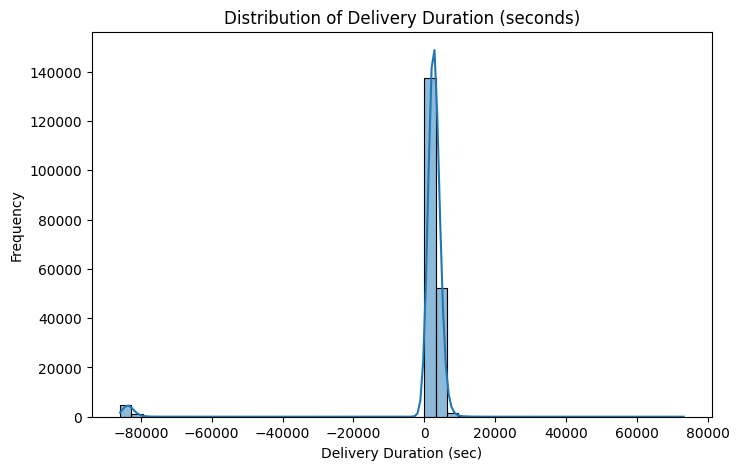

In [ ]:
# Step 7: Exploratory Data Analysis (EDA)
# Histogram of delivery times
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_duration_sec'], bins=50, kde=True)
plt.title("Distribution of Delivery Duration (seconds)")
plt.xlabel("Delivery Duration (sec)")
plt.ylabel("Frequency")
plt.show()

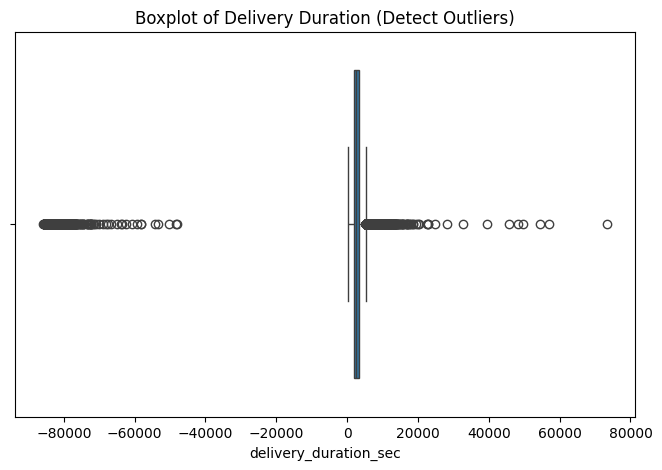

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['delivery_duration_sec'])
plt.title("Boxplot of Delivery Duration (Detect Outliers)")
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your dataset
Q1 = df['delivery_duration_sec'].quantile(0.25)
Q3 = df['delivery_duration_sec'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['delivery_duration_sec'] < lower_bound) | (df['delivery_duration_sec'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['delivery_duration_sec']].head())


Number of outliers: 11905
    delivery_duration_sec
11                 8067.0
20               -84667.0
23                 5840.0
24                 5574.0
88                 5597.0


In [ ]:
df_clean = df[(df['delivery_duration_sec'] >= lower_bound) & 
              (df['delivery_duration_sec'] <= upper_bound)]

print(f"Original rows: {len(df)}, Cleaned rows: {len(df_clean)}")


Original rows: 197421, Cleaned rows: 185516
